## Метрики оценки качества работы искусственной нейронной сети

## Accuracy

Интуитивно понятной, очевидной и почти неиспользуемой метрикой является accuracy — доля правильных ответов алгоритма.

$$ \large Accuracy = \frac{P}{N}, $$

где $P$ — количество верно предсказанных классов,

$\quad\  N$ — общее количество тестовых примеров.

In [2]:
from sklearn.metrics import accuracy_score


y_targ = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred = [1, 0, 0, 0, 1, 2, 0, 2, 2]

accuracy_score(y_targ, y_pred)

0.5555555555555556

**Какие есть недостатки у такого способа подсчёта?**

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/problem_of_simple_way_to_compute_accuracy.png" width="600" >

Accuracy нельзя использовать, если **данные не сбалансированы**. То есть в одном из классов больше представителей, чем в другом.

На рисунке выше мы видим, что при явном количественном преобладании объектов класса airplane модель может классифицировать все объекты как airplane и при этом получить такую же точность, как модель, которая учит все 3 класса, так как количество ошибок будет равно числу объектов классов, в которых меньше представителей (в данном случае в классах automobile и bird по 10 представителей, соответсвенно, 20 ошибок).

Также она не подойдет для задач сегментации и детектирования: если требуется не только определить наличие объекта на изображении, но и найти место, где он находится, то весьма желательно учитывать разницу в координатах.

Для решения этой проблемы вводятся метрики "точность" и "полнота"

## Precision, Recall

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики **precision (точность)** и **recall (полнота)**.


$\large precision = \frac{TP}{TP + FP}$


$\large recall = \frac{TP}{TP + FN}$

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

<img src ="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" width="600">

Для численного описания этих метрик необходимо ввести важную концепцию для описания в терминах ошибок классификации — **confusion matrix** (матрица ошибок).
Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:


|      |$\large y=0$  |$\large y=1$   |
| ---  |---  |---   |
| $\large \widehat{y}=0$    | $\large True Negative (TN)$ | $\large False Positive (FP)$ | 
| $\large \widehat{y}=1$    |$\large False Negative (FN)$ | $\large True Positive (TP) $ |


Пример классификатора, способного проводить различие между всего лишь двумя классами, "пятерка" и "не пятерка" из набора рукописных цифр MNIST. Ниэе приведён код для матрицы ошибок:

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (## WRITE YOUR CODE HERE) # True для всех пятерок, False для в сех остальных цифр. Задача опознать пятерки
y_test_5 = (## WRITE YOUR CODE HERE)

sgd_clf = SGDClassifier(random_state=42) # классификатор на основе метода стохастического градиентного спуска (англ. Stochastic Gradient Descent SGD)

sgd_clf.fit(## WRITE YOUR CODE HERE) # обучаем классификатор распозновать пятерки на целом обучающем наборе
# Для расчета матрицы ошибок сначала понадобится иметь набор прогнозов, чтобы их можно было сравнивать с фактическими целями

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print(confusion_matrix(## WRITE YOUR CODE HERE))
# array([[53892, 687],
#        [ 1891, 3530]])

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1170767849.py, line 16)

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Создаем бинарную метку: True для всех пятерок, False для всех остальных цифр. Наша задача - распознать пятерки.
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42) # Создаем классификатор на основе метода стохастического градиентного спуска (SGD)

sgd_clf.fit(X_train, y_train_5) # Обучаем классификатор на всем обучающем наборе данных для распознавания пятерок

# Для расчета матрицы ошибок (confusion matrix) нам необходимы прогнозы для сравнения с фактическими целевыми значениями

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print(confusion_matrix(y_train_5, y_train_pred))
# array([[53892, 687],
#        [ 1891, 3530]])

[[53892   687]
 [ 1891  3530]]


**Именно** введение **precision** не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. **Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.**

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/precision-recall.png" width="800" >

**Accuracy**

Accuracy также можно посчитать через матрицу ошибок.

$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$


**Balanced accuracy**

В случае дисбаланса классов есть специальный аналог точности – сбалансированная точность.

$\ BA = \frac{R_1 + R_0}{2} = \frac{1}{2} (\frac{TP}{TP + FN} + \frac{TN}{TN + FP})$

Для сбалансированного и несбалансированного случаев она будет равна $0. 96$ и $0.33$ соответственно.

Для простоты запоминания – это среднее полноты всех классов.

### Задание: посчитать вручную метрики для полученной матрицы  array([[53892, 687], [ 1891, 3530]])

In [7]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
precision = TP / (TP + FP)

print(precision)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



## F-мера

Ошибки классификации бывают двух видов: **False Positive** и **False Negative**. Первый вид ошибок называют **ошибкой I-го рода**, второй — **ошибкой II-го рода**. Пусть студент приходит на экзамен. Если он учил и знает, то принадлежит классу с меткой 1, иначе — имеет метку 0 (знающего студента называем «положительным»). Пусть экзаменатор выполняет роль классификатора: ставит зачёт (т.е. метку 1) или отправляет на пересдачу (метку 0). Самое желаемое для студента «не учил, но сдал» соответствует ошибке 1 рода, вторая возможная ошибка «учил, но не сдал» – 2 рода.




<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/1_2_errors.png" width="600" >

Часто в реальной практике стоит задача найти **оптимальный** **баланс** между **Presicion и Recall**. Классическим примером является задача определения оттока клиентов.

**F-мера** (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall :

$\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$


$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$).
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.



Сбалансированная F-мера, $β=1$:

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/f1_balanced.png" width="500" >

При перекосе в точность ($β=1/4$):

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/f1_unbalanced.png" width="500" >

Более наглядно: низкие значения точности не позволяют метрике F вырасти.

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/f1_lines.png" width="600" >

<center><em>Зависимость F1-меры от полноты при фиксированной точности. При точности 10% F1-мера не может быть больше 20%.</em></center>


В sklearn есть удобная функция **sklearn.metrics.classification_report**, возвращающая recall, precision и F-меру для каждого из классов, а также количество экземпляров каждого класса.

In [11]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ["class 0", "class 1", "class 2"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



## Задание. Посчитать отдельно метрики precision, recall, f1-score для нейронной сети из прошлого задания для набора данных MNIST

In [15]:
import torch
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

model = NeuralNetwork()
# model.load_state_dict(torch.load("model_weights.pth"))
# print(list(model.parameters()))

In [20]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from IPython.display import clear_output
from torch.utils.data import DataLoader

train_data = datasets.MNIST(
    root="./MNIST", train=True, download=True, transform=ToTensor()
)

test_data = datasets.MNIST(
    root="./MNIST", train=False, download=True, transform=ToTensor()
)


train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

imgs, labels = next(iter(test_dataloader))
pred = model(torch.reshape(imgs, (64, 28, 28)).to(device))

pred = pred.detach()
digits = np.argmax(pred.cpu().numpy(), axis=1)

y_true = [labels[i].item() for i in range(len(labels))]
y_pred = digits
target_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

Using cpu device


### Accuracy:

In [22]:
## WRITE YOUR CODE HERE
accuracy_score(y_true, y_pred)

0.078125

In [26]:
(y_true == y_pred).sum() / len(y_true)

0.078125

### Precision:

In [45]:
from sklearn.metrics import precision_score

precision_score(y_true, y_pred, average=None, zero_division=False)

array([0.        , 0.        , 0.        , 0.08196721, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

### Recall:

In [50]:
from sklearn.metrics import recall_score

recall_score(y_true, y_pred, average=None)

array([0.        , 0.        , 0.        , 0.83333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [101]:
## WRITE YOUR CODE HERE

[1.         1.         0.71428571 0.83333333 0.9        1.
 0.66666667 1.         1.         1.        ]


### Classification report:

In [31]:
## WRITE YOUR CODE HERE
print(classification_report(y_true, y_pred, zero_division=False))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         5
           3       0.08      0.83      0.15         6
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         7

    accuracy                           0.08        64
   macro avg       0.01      0.08      0.01        64
weighted avg       0.01      0.08      0.01        64



### Многоклассовый случай

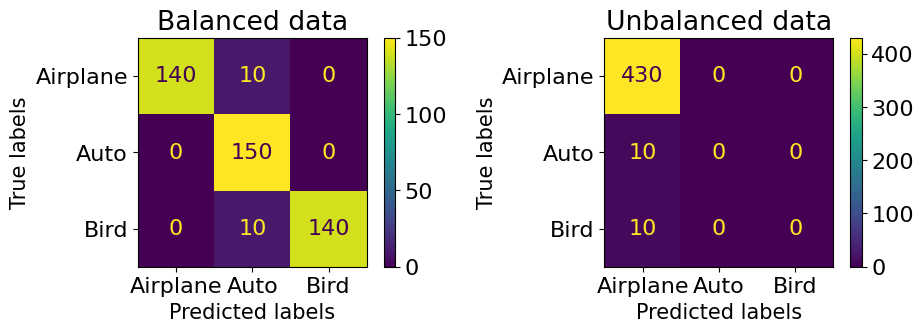

Accuracy Balanced   Data: 0.96
Accuracy Unbalanced Data: 0.96


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3.0)
plt.rcParams.update({"font.size": 16})
# font = {'size':'21'}
ax[0].set_title("Balanced data")
ax[1].set_title("Unbalanced data")

labels = ["Airplane", "Auto", "Bird"]

# Balanced data
air, auto, bird = 150, 150, 150
actual_b = np.array([0] * air + [1] * auto + [2] * bird)
predicted_b = np.array([0] * (air - 10) + [1] * (auto + 20) + [2] * (bird - 10))

# Unbalanced data
air, auto, bird = 430, 10, 10
actual_ub = np.array([0] * air + [1] * auto + [2] * bird)
predicted_ub = np.array([0] * (air + 20) + [1] * (auto - 10) + [2] * (bird - 10))

# Balanced data
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(actual_b, predicted_b),
    display_labels=labels,
).plot(ax=ax[0])

# Unbalanced data
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(actual_ub, predicted_ub),
    display_labels=labels,
).plot(ax=ax[1])

label_font = {"size": "15"}  # Adjust to fit
ax[0].set_xlabel("Predicted labels", fontdict=label_font)
ax[0].set_ylabel("True labels", fontdict=label_font)
ax[1].set_xlabel("Predicted labels", fontdict=label_font)
ax[1].set_ylabel("True labels", fontdict=label_font)

plt.show()

print(
    "Accuracy Balanced   Data:", round(metrics.accuracy_score(actual_b, predicted_b), 2)
)
print(
    "Accuracy Unbalanced Data:",
    round(metrics.accuracy_score(actual_ub, predicted_ub), 2),
)

In [54]:
print(
    "Balanced accuracy for Balanced data  :",
    round(metrics.balanced_accuracy_score(actual_b, predicted_b), 2),
)
print(
    "Balanced accuracy for Unbalanced data :",
    round(metrics.balanced_accuracy_score(actual_ub, predicted_ub), 2),
)

Balanced accuracy for Balanced data  : 0.96
Balanced accuracy for Unbalanced data : 0.33


**Multiclass Accuracy**


В случае многоклассовой классификации термины TP, FP, TN, FN считаются для каждого класса:

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/confmatrix.png" width="600" >\

$\displaystyle \large Multiclass Accuracy = \frac{1}{n}\sum_{i=1}^{n} [actual_{i}==predicted_{i}]  =   \frac{\sum_{k=1}^{N} TP_{Ck} }{\sum_{k=1}^{N} (TP_{Ck} + TN_{Ck} + FP_{Ck} + FN_{Ck})}$

## AUC-ROC

ROC = receiver operating characteristic, AUC = area under the curve

Пусть решается задача бинарной классификации, и необходимо оценить важность признака $j$ для решения именно этой задачи. В этом случае можно попробовать построить классификатор, который использует лишь этот один признак $j$, и оценить его качество. Например, можно рассмотреть очень простой классификатор, который берёт значение признака $j$ на объекте, сравнивает его с порогом $t$, и если значение больше этого порога, то он относит объект к первому классу, если же меньше порога — то к другому, нулевому или минус первому, в зависимости от того, как мы его обозначили. Далее, поскольку этот классификатор зависит от порога $t$, то его качество можно измерить с помощью таких метрик, как площадь под ROC-кривой или Precision-Recall кривой, а затем по данной площади отсортировать все признаки и выбрать лучшие.

Но вначале разберёмся, что такое **AUC-ROC**.

### Построение

ROC-кривой (ROC, receiver operating characteristic, кривой ошибок) традиционно называют график кривой, которая характеризует качество предсказаний бинарного классификатора на некоторой фиксированной выборке при всех значениях порога классификации. Площадь под графиком ROC-кривой AUC (area under the curve) является численной характеристикой качества классификатора. Определим, как именно строится ROC-кривая, через рассмотрение примера.

Вывод некоторого бинарного классификатора представлен в табл. 1. Упорядочим строки данной таблицы по убыванию значения вывода нашего бинарного классификатора и запишем результат в табл. 2. Если наш алгоритм справился с задачей классификации, то мы увидим в последней колонке также упорядоченные по убыванию значения (или случайное распределение меток 0 и 1 в противном случае).

<center><img src="https://edunet.kea.su/repo/EduNet-content/L01/out/roc_auc_data_example.png" alt="alttext" width=600/></center>

Приступим непосредственно к изображению графика ROC-кривой. Начнём с квадрата единичной площади и изобразим на нём прямоугольную координатную сетку, равномерно нанеся $m$ горизонтальных линий и $n$ вертикальных. Число горизонтальных линий $m$ соответствует количеству объектов класса $1$ из рассматриваемой выборки, а число $n$ — количеству объектов класса $0$. В нашем примере $m=3$ и $n=4$. Таким образом, квадрат единичной площади разбился на $m \times n$ прямоугольных блоков (на $12$ штук согласно нашему примеру).

Начиная из точки $(0, 0)$, построим ломаную линию в точку $(1, 1)$ по узлам получившейся решетки по следующему алгоритму:
- рассмотрим последовательно все строки табл. 2
- оценка алгоритма для объекта из текущей строки не равна оценке для объекта из следующей:
- - если в строке содержится объект с меткой класса $1$, рисуем линию до следующего узла вертикально вверх
- - если в строке содержится объект с меткой класса $0$, рисуем линию до следующего узла горизонтально направо
- оценки для объектов в нескольких последующих строках совпадают:
- - нарисовать линию из текущего узла в узел, располагающийся на $k$ углов вертикально выше и на $l$ узлов левее. $k$ и $l$ соответственно равны количеству объектов класса $1$ и $0$ среди группы повторяющихся значений оценок классификатора

(всего потребуется не более $n + m$ шагов — столько же, сколько строк в нашей таблице)

<center><img src="https://edunet.kea.su/repo/EduNet-content/L01/out/make_roc_curve.png" alt="alttext" width=500/></center>

<center><em>Рис.1. Построение ROC-кривой.</em></center>

Справа на рис. 1 показана полученная для нашего примера кривая – эта изображенная на единичном квадрате ломанная линия и называется ROC-кривой.

Вычислим площадь под получившийся кривой — **AUC-ROC**. В нашем примере AUC-ROC $= 9.5 / 12 ~ 0.79$, и именно это значение является искомой метрикой качества работы нашего бинарного классификатора.
(Так как мы начали свое построение с квадрата единичной площади, то AUC-ROC может принимать значения в $[0,1]$)


1. ROC-кривая абсолютно точного бинарного классификатора имеет вид $(0,0) \rightarrow (1,0) \rightarrow (1,1)$. ROC-AUC для такого идеального классификатора равен площади всего единичного квадрата.
2. ROC-кривая для всегда ошибающегося бинарного классификатора имеет вид $(0,0) \rightarrow (0,1) \rightarrow (1,1)$. ROC-AUC в этом случае равен нулю.
3. Если наш бинарный классификатор для всех объектов предскажет одно и то же значение, то его ROC-кривая будет иметь вид $(0,0) \rightarrow (1,1)$


<center><img src="https://edunet.kea.su/repo/EduNet-content/L01/out/various_roc_curves.png" alt="alttext" width=500/></center>

<center><em>Рис. 2. ROC-кривые для наилучшего (AUC=1), константного (AUC=0.5) и наихудшего (AUC=0) алгоритма.</em></center>


### Смысл метрики

Как можно заметить на рис. 3, координатная сетка, описанная в нашем алгоритме построения ROC кривой, разбила единичный квадрат на столько прямоугольников, сколько существовало пар объектов класс-$0$ — класс-$1$ в исследуемой выборке данных. Если теперь посчитать количество оказавшихся под ROC-кривой прямоугольников, то можно заметить, что оно в точности равно числу верно классифицированных алгоритмом пар объектов, то есть таких пар объектов противоположных классов, для которых алгоритм поставил большую по величине оценку для объекта класса $1$.

<center><img src="https://edunet.kea.su/repo/EduNet-content/L01/out/roc_auc_pairs_descripton.png" alt="alttext" width=200/></center>

<center><em>Рис. 3. Каждый блок соответствует паре объектов.</em></center>

Таким образом, **ROC-AUC равен части верно упорядоченных оценкой классификатора пар объектов противоположных классов (в которой объект класса $0$ получил оценку исследуемым классификатором ниже, чем объект класса $1$)**. Это явно записывается формулой:


$$\text{ROC-AUC} = \frac{\sum_{i=1}^{N} \sum_{j=1}^{N} I[y_{i} < y_{j}]I'[a_{i} < a_{j}] } {\sum_{i=1}^{N} \sum_{j=1}^{N} I[y_{i} < y_{j}]} $$


\begin{equation*}
I'[a_{i}< a_{j}] =
 \begin{cases}
   0, & \quad a_{i} > a_{j},
   \\
   0.5, & \quad a_{i} = a_{j},
   \\
   1, & \quad a_{i} < a_{j}.
 \end{cases}
\end{equation*}

\begin{equation*}
I[y_{i}< y_{j}] =
 \begin{cases}
   0, & \quad y_{i} \geq y_{j},
   \\
   1, & \quad y_{i} < y_{j}.
 \end{cases}
\end{equation*}

$ a_{i} $ — выходное значение классификатора на $i$-м  объекте, $ y_{i} $ — априорно верная метка класса для того же объекта, $N$ — полное число объектов.

Данное определение можно обобщить на задачу классификации непрерывного множества объектов. Пусть мы взяли два случайных объекта разных классов: $x_i$ класса $0$ и $x_j$, принадлежащий классу $1$. Тогда метрика ROC-AUC равна вероятности того, что в такой паре объектов объект класса $1$ получил оценку выше, нежели объект класса $0$:

$$\text{ROC-AUC}(a) = P(a(x_i) < a(x_j) | y_i=0, y_j=1)$$

## Построение ROC-кривой для бинарного классификатора.

Подключим необходимые библиотеки.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Создадим синтетический набор данных. Сгененируем 1й класс из нормального распределения.

In [56]:
class1_x = np.random.normal(loc = 10, scale = 5, size = 500)
class1_y = np.random.normal(loc = 1, scale = 5, size = 500)

Создадим 2й класс с дисперсией 5, размерности 500 и математическим ожиданием 1 и 5 соответственно:

In [57]:
class2_x = np.random.normal(loc = 1, scale = 5, size = 500)
class2_y = np.random.normal(loc = 5, scale = 5, size = 500)

Нарисуем полученные значения на плоскости.

<AxesSubplot: >

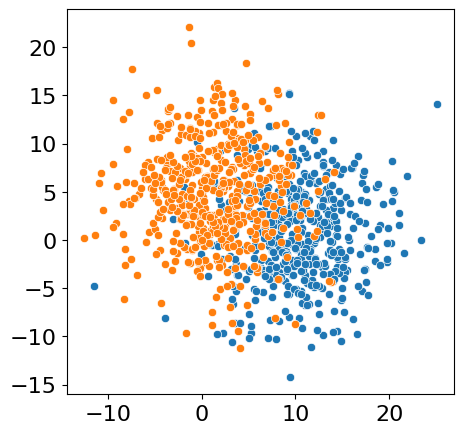

In [58]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = class1_x, y = class1_y)
sns.scatterplot(x = class2_x, y = class2_y)

Переведём оба класса в многомерные массивы (dataframe).

In [76]:
df_class1 = pd.DataFrame()
df_class1['x'] = class1_x
df_class1['y'] = class1_y
df_class1['class'] = 0

In [77]:
df_class2 = pd.DataFrame()
df_class2['x'] = class2_x
df_class2['y'] = class2_y
df_class2['class'] = 1

И соединим их в один большой массив данных.

In [78]:
df_class1

,x,y,class
0,14.893066,3.082381,0
1,12.149814,5.951588,0
2,9.200329,4.877649,0
3,14.566900,-2.003667,0
4,9.028599,-2.117706,0
...,...,...,...
495,8.919217,6.854227,0
496,8.203899,3.092030,0
497,7.884890,-2.751414,0
498,13.704050,-0.068799,0


In [81]:
df = pd.merge(df_class1, df_class2, how="outer")
df

,x,y,class
0,14.893066,3.082381,0
1,12.149814,5.951588,0
2,9.200329,4.877649,0
3,14.566900,-2.003667,0
4,9.028599,-2.117706,0
...,...,...,...
995,4.450079,10.151486,1
996,3.997645,5.832473,1
997,-3.428083,8.809736,1
998,3.285711,-0.625426,1


In [83]:
(df["class"] == 1).sum()

500

Разделим переменные на независимые и зависимые.

In [84]:
X = df.drop(columns = ['class'])
y = df['class']

Разделим данные на тренировочные и тестовые в соотношении 1 к 3.

In [87]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1/3)

Выберем простой наивный байесовский классификатор ([статья в Википедии](https://ru.wikipedia.org/wiki/Наивный_байесовский_классификатор), [код реализации применения алгоритма для отслеживания спама](https://github.com/makispl/SMS-Spam-Filter-Naive-Bayes/blob/master/SMS_Spam_Filtering_Naive_Bayes.ipynb)).

In [88]:
from sklearn.naive_bayes import GaussianNB

Создадим объект модели.

In [90]:
model = GaussianNB()
model

GaussianNB()

Подадим модели на вход тренировочные данные.

In [92]:
## WRITE YOUR CODE HERE
model.fit(X_train, y_train)

GaussianNB()

Выведем предсказания на тестовых данных.

In [93]:
y_pred = model.predict(X_test)

Выведем первые 10 выходов.

In [94]:
y_pred[:10]

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

Предскажем классы для тестовых данных и вернём вероятности для каждого класса:

In [95]:
y_proba = model.predict_proba(X_test)

Посмотрим на первые 10 выходных значений.

In [96]:
y_proba[:10]

array([[0.81371089, 0.18628911],
       [0.01605175, 0.98394825],
       [0.99856375, 0.00143625],
       [0.16499038, 0.83500962],
       [0.05200499, 0.94799501],
       [0.04569951, 0.95430049],
       [0.94368312, 0.05631688],
       [0.17769059, 0.82230941],
       [0.9956136 , 0.0043864 ],
       [0.63963723, 0.36036277]])

Выведем полученные значения в виде графика на экран.

<AxesSubplot: xlabel='x', ylabel='y'>

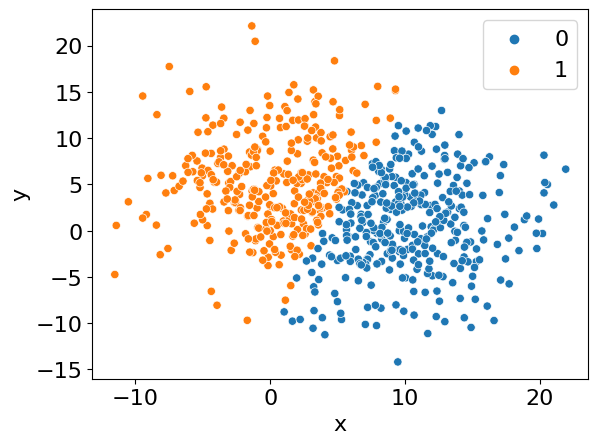

In [97]:
sns.scatterplot(x = X_test['x'], y = X_test['y'], hue = y_pred)

Построим ROC-кривую. Для этого сначала импортируем confusion_matrix, введём функци для посчёта её значений и явного выделения TN, FP, FN, TP. Результатом функции будут true positive rate и false positive rate.

In [100]:
from sklearn.metrics import confusion_matrix

In [119]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Посчитать confusion matrix и явно выделить значения
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    
    # Посчитать tpr и fpr 
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)
    
    return tpr, fpr

Построим функцию для выделения координат точек ROC-кривой.

In [120]:
def get_n_roc_coordinates(y_real, y_proba, resolution = 50):
    '''
    Calculates "n" ROC Curve coordinates (tpr and fpr) by manipulating the threshold used to predict the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        resolution: Defines how many divisions the threshold will have, and how many coordinates will be calculated (default = 50).
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(resolution):
        threshold = i/resolution
        y_pred = y_proba[:, 1] > threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

Создадим отдельно функцию для непосредственного вывода графика на экран.

In [121]:
def plot_roc_curve(tpr, fpr, scatter = True):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    plt.figure(figsize = (5, 5))
    if scatter:
        sns.scatterplot(x = fpr, y = tpr)
    sns.lineplot(x = fpr, y = tpr)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

Теперь получите ROC-кривую для 10 точек. 

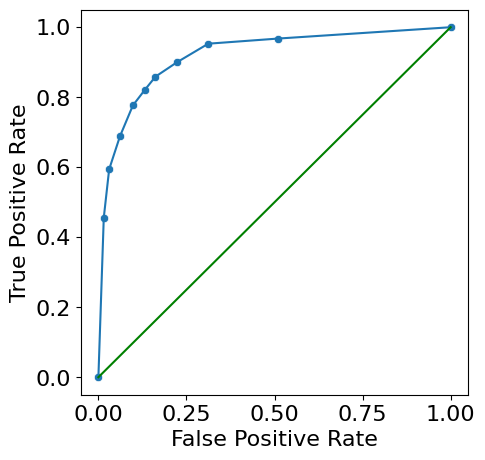

In [157]:
tpr, fpr = get_n_roc_coordinates(y_test, y_proba, resolution=10)

plot_roc_curve(tpr, fpr)

Построение ROC-кривой с использованием библиотеки Sklearn

In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [133]:
def plot_sklearn_roc_curve(y_real, y_pred):
    '''
    Plots the ROC Curve with the sklearn methods by using the real observations and their predictions.
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
    '''
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)

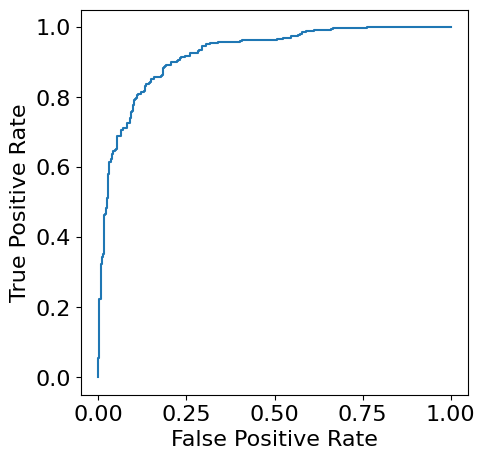

In [134]:
# Plots the ROC curve using the sklearn methods
plot_sklearn_roc_curve(y_test, y_proba[:, 1])

Выведем все метрики для данной модели.

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [137]:
def evaluate_classifier(y_real, y_pred):
    '''
    Prints the accuracy, precision, recall and roc auc scores for the classifier.
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
    '''
    print(f"Accuracy: {accuracy_score(y_real, y_pred):.4f}")
    print(f"Precision: {precision_score(y_real, y_pred):.4f}")
    print(f"Recall: {recall_score(y_real, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_real, y_pred):.4f}")

In [138]:
evaluate_classifier(y_test, y_pred)

Accuracy: 0.8441
Precision: 0.8665
Recall: 0.8206
ROC AUC: 0.8445


## Построение ROC-кривой для многоклассового случая.

Загружаем необходимые библиотеки.

In [141]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.datasets import load_iris

Загрузить набо данных The Iris Dataset, выделить непосредственно данные и целевые метки.

In [145]:
iris = load_iris()
X = iris["data"]
y = iris["target"]

Перевести метки классов в трехмерный вектор принадлежности каждого класса при помощи функции label_binarize.

In [148]:
y = label_binarize(y, classes=np.unique(y))
n_classes = y.shape[1]

Разделить данные на тренировочную и тестовую части в равных долях.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/2)

Применим алгоритм One-vs-the-rest (OvR) multiclass strategy.

In [160]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

Построим ROC-кривые для каждого класса и выведем значение площади под каждой кривой.

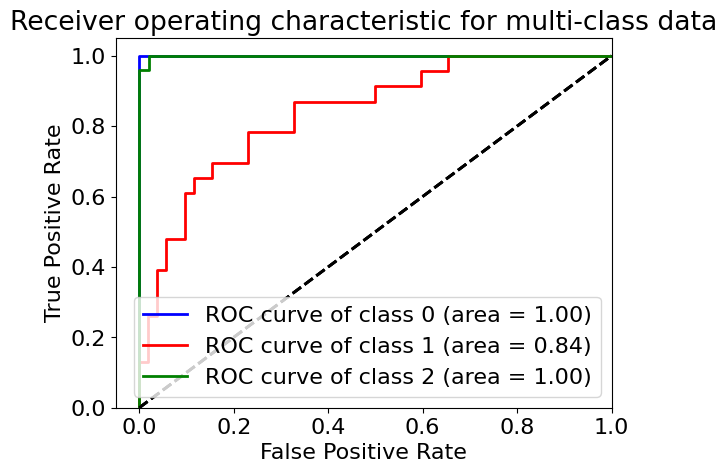

In [161]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

[Задачи от Александра Дьяконова на понимание логики ROC-AUC](https://alexanderdyakonov.wordpress.com/2015/10/09/задачки-про-auc-roc/)